In [1]:
# import required libraries
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import bokeh as bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from prophet import Prophet

In [2]:
# establish file paths
# aura = Path('data/Sales_Aura.xls')
# ben = Path('data/Sales_Ben.xls')
# regal = Path('data/Sales_Regal.xls')
# ultra = Path('data/Sales_Ultraspec.xls')
# aura_mod = Path('data/Sales_Aura_remod.xls')
# full = Path('data/Sales_AllStores_ABRU.xlsx')
waco_path = Path('data/waco_full.xls')
all_stores_path = Path('data/allStores_2007toPresent.xls')
all_store2_path = Path('data/allStores_2007toPresent2.xls')
all_store3_path = Path('data/allStores_2007toPresent3.xls')

In [3]:
# first iteration
all_store_data = pd.read_excel(all_stores_path)
all_store_data.head(25)

,Year,Month,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,November,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,NaN,NaN,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,NaN,December,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,NaN,NaN,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133
5,NaN,NaN,51.0,NaN,NaN,NaN,NaN,7291.96,250,NaN,NaN,NaN,NaN,7291.96,250
6,NaN,NaN,52.0,NaN,NaN,NaN,NaN,12813.24,313,NaN,NaN,NaN,NaN,12813.24,313
7,NaN,NaN,53.0,NaN,NaN,NaN,NaN,191.8,3,NaN,NaN,NaN,NaN,191.8,3
8,2008,January,1.0,NaN,NaN,NaN,NaN,1838.45,60,NaN,NaN,NaN,NaN,1838.45,60
9,NaN,NaN,2.0,NaN,NaN,NaN,NaN,5866.86,177,NaN,NaN,NaN,NaN,5866.86,177


In [4]:
# second iteration
all_store2_data = pd.read_excel(all_store2_path)
all_store2_data.head()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,NaN,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,NaN,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,NaN,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [5]:
all_store3_data = pd.read_excel(all_store3_path)
all_store3_data.head()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons,Sales,Gallons
1,2007,47.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2007,48.0,NaN,NaN,NaN,NaN,4697.64,148,NaN,NaN,NaN,NaN,4697.64,148
3,2007,49.0,NaN,NaN,NaN,NaN,3233.57,88,NaN,NaN,NaN,NaN,3233.57,88
4,2007,50.0,NaN,NaN,NaN,NaN,4526.86,133,NaN,NaN,NaN,NaN,4526.86,133


In [6]:
all_store3_data.tail()

,Year,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
990,2024,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
991,2024,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
992,2024,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
993,2024,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
994,Grand Total,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


In [7]:
store3_data = all_store3_data[['Year', 'Week', 'store 003', 'store 003.1']]
store3_data = store3_data.drop(index=0)
store3_data = store3_data.drop(index=994)
store3_data.head()
renamed_store3_data = store3_data.rename(columns={'store 003': 'Sales', 'store 003.1': 'Gallons'})
# this one!
renamed_store3_data.head()

,Year,Week,Sales,Gallons
1,2007,47.0,0,NaN
2,2007,48.0,4697.64,148
3,2007,49.0,3233.57,88
4,2007,50.0,4526.86,133
5,2007,51.0,7291.96,250


In [8]:
renamed_store3_data.tail()

,Year,Week,Sales,Gallons
989,2024,18.0,15687.08,256
990,2024,19.0,26200.68,492
991,2024,20.0,24729.34,473
992,2024,21.0,27596.85,571
993,2024,22.0,18877.38,281


In [9]:
renamed_store3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 1 to 993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     993 non-null    object 
 1   Week     992 non-null    float64
 2   Sales    991 non-null    object 
 3   Gallons  990 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


In [10]:
total_data = all_store3_data[['Year', 'Week', 'Total Sales', 'Total gallons']]
total_data.head()

,Year,Week,Total Sales,Total gallons
0,NaN,NaN,Sales,Gallons
1,2007,47.0,0,NaN
2,2007,48.0,4697.64,148
3,2007,49.0,3233.57,88
4,2007,50.0,4526.86,133


In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           994 non-null    object 
 1   Week           992 non-null    float64
 2   Total Sales    995 non-null    object 
 3   Total gallons  993 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.2+ KB


In [12]:
all_store_data.tail()

,Year,Month,Week,store 001,store 001.1,store 002,store 002.1,store 003,store 003.1,store 004,store 004.1,store 005,store 005.1,Total Sales,Total gallons
990,NaN,NaN,19.0,30261.43,857,9547.49,160,26200.68,492,3018.85,49,11716.28,277,80744.73,1835
991,NaN,NaN,20.0,24508.95,755,9729.7,197,24729.34,473,2719.86,49,8478.54,177,70166.39,1651
992,NaN,NaN,21.0,23260.02,653,7470.76,153,27596.85,571,2497.37,40,6763.67,119,67588.67,1536
993,NaN,NaN,22.0,12931.37,377,2241.7,50,18877.38,281,2653.46,64,3555.26,70,40259.17,843
994,Grand Total,NaN,NaN,6050435.64,205587,2753066.75,86811,7794913.54,206641,517653.17,10331,4198729.48,105683,21314798.58,615054


<Axes: xlabel='Year'>

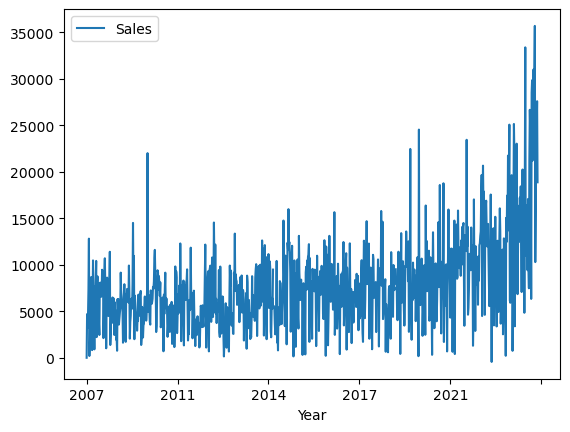

In [13]:
renamed_store3_data.plot.line(
    x= 'Year',
    y= 'Sales'
)

<Axes: xlabel='Year', ylabel='Sales'>

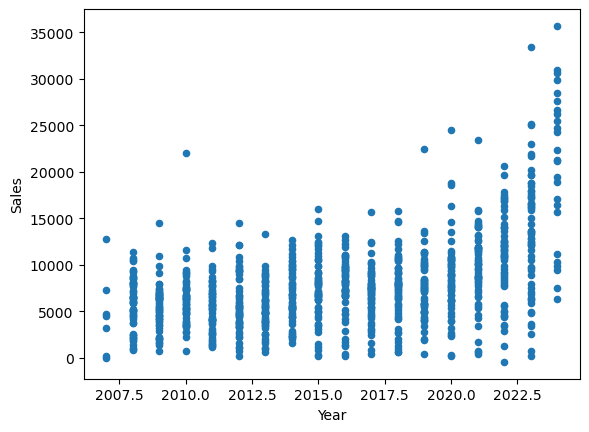

In [14]:
renamed_store3_data.plot.scatter(
    x= 'Year',
    y= 'Sales'
)

<Axes: xlabel='Year'>

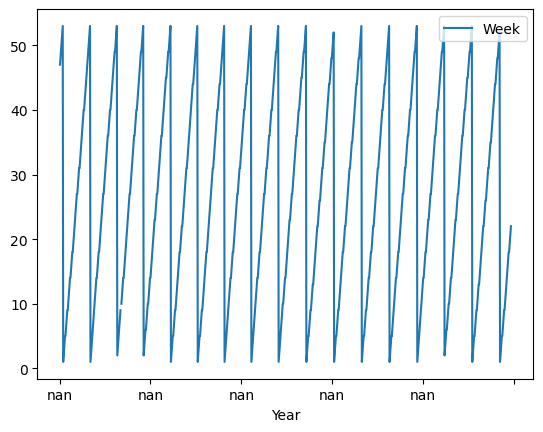

In [15]:
all_store_data.plot.line(
    x= 'Year',
    y= 'Week'
)

In [ ]:
# Following cells are my work

In [34]:
# Import and read file 
store3_path = Path("data/new_renamed_store3_data.csv")
store3_final_df = pd.read_csv(store3_path)

store3_final_df.head()


,Year,Week,Monthn,Sales,Gallons,date
0,2007,47,11,0.00,NaN,2007-11-19
1,2007,48,11,4697.64,148.0,2007-11-26
2,2007,49,12,3233.57,88.0,2007-12-03
3,2007,50,12,4526.86,133.0,2007-12-10
4,2007,51,12,7291.96,250.0,2007-12-17


In [35]:
# Verify Data types in data frame
store3_final_df.dtypes

Year         int64
Week         int64
Monthn       int64
Sales      float64
Gallons    float64
date        object
dtype: object

In [36]:
# Set the "date" column to datetime format
store3_final_df['date'] = pd.to_datetime(store3_final_df['date'])

In [37]:
# Set index 
store3_final_df.set_index('date', inplace=True)

In [38]:
# display first few rows
print(store3_final_df.head())

            Year  Week  Monthn    Sales  Gallons
date                                            
2007-11-19  2007    47      11     0.00      NaN
2007-11-26  2007    48      11  4697.64    148.0
2007-12-03  2007    49      12  3233.57     88.0
2007-12-10  2007    50      12  4526.86    133.0
2007-12-17  2007    51      12  7291.96    250.0


In [39]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test to check for stationarity
result = adfuller(store3_final_df['Sales'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the result
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -0.7166006722256605
p-value: 0.8424026043008136
The time series is not stationary.


In [40]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Fit the ARIMA model
# Here we use p=1, d=1, q=1 as an example. You may need to adjust these parameters based on ACF and PACF plots.
model = ARIMA(store3_final_df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  992
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9542.426
Date:                Thu, 06 Jun 2024   AIC                          19090.852
Time:                        12:47:29   BIC                          19105.548
Sample:                             0   HQIC                         19096.440
                                - 992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1458      0.034      4.350      0.000       0.080       0.211
ma.L1         -0.9227      0.012    -78.360      0.000      -0.946      -0.900
sigma2      1.627e+07   1.99e-10   8.18e+16      0.0

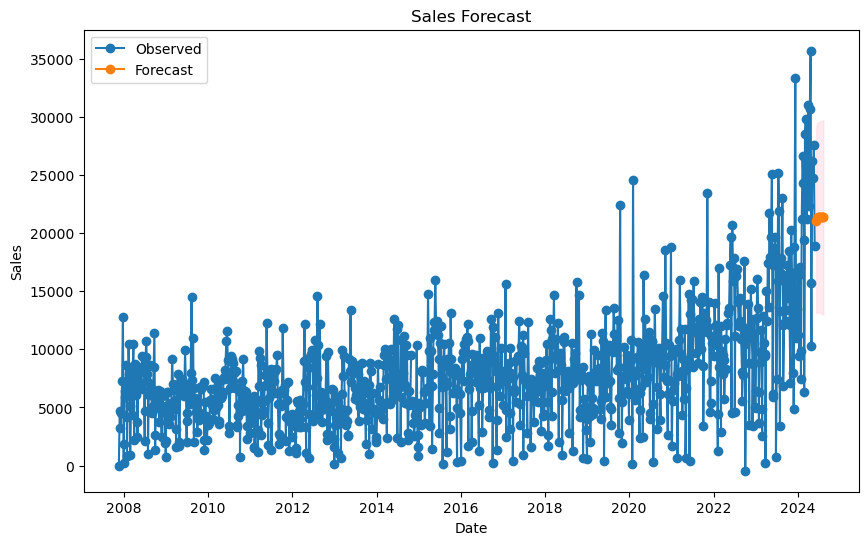

In [41]:

# Forecast future values
forecast_steps = 10  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract the forecasted mean, standard error, and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=store3_final_df.index[-1], periods=forecast_steps + 1, freq='W')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(store3_final_df['Sales'], label='Observed', marker='o')
plt.plot(forecast_index, forecast_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

